# ASHRAE - Great Energy Predictor III
https://www.kaggle.com/competitions/ashrae-energy-prediction/overview

In [4]:
# データダウンロード
!kaggle competitions download -c ashrae-energy-prediction -p ./data

100%|███████████████████████████████████████▉| 378M/379M [00:40<00:00, 8.88MB/s]
100%|████████████████████████████████████████| 379M/379M [00:40<00:00, 9.89MB/s]


In [11]:
# インポート定義

import os
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# 定数定義

DATA_DIRECTORY_PATH = "./data"
""" データディレクトリ """


' データディレクトリ '

In [13]:
def read_train_data() -> pd.DataFrame:
  """トレーニングデータ ロード"""
  loadFilePath = os.path.join(DATA_DIRECTORY_PATH, "train.csv")
  res = pd.read_csv(loadFilePath, header=0)
  return res

In [14]:
def read_test_data() -> pd.DataFrame:
  """テストデータ ロード"""
  loadFilePath = os.path.join(DATA_DIRECTORY_PATH, "test.csv")
  res = pd.read_csv(loadFilePath, header=0)
  return res

In [15]:
def read_building_data() -> pd.DataFrame:
  """ビル属性情報 ロード"""
  loadFilePath = os.path.join(DATA_DIRECTORY_PATH, "building_metadata.csv")
  res = pd.read_csv(loadFilePath, header=0)
  return res

In [16]:
def read_weather_train_data() -> pd.DataFrame:
  """天候情報トレーニングデータ ロード"""
  loadFilePath = os.path.join(DATA_DIRECTORY_PATH, "weather_train.csv")
  res = pd.read_csv(loadFilePath, header=0)
  return res

In [17]:
def read_weather_test_data() -> pd.DataFrame:
  """天候情報テストデータ ロード"""
  loadFilePath = os.path.join(DATA_DIRECTORY_PATH, "weather_test.csv")
  res = pd.read_csv(loadFilePath, header=0)
  return res

---

#### メモ

解説  
https://sukekiyo-ds.hatenablog.com/entry/2019/12/31/102819

https://www.deep-percept.co.jp/blog/category02/20200623423/

#### 値の意味

| 項目 | 意味 |
| --- | --- |
| meter | メーター種別（0：電力、1：冷水、2：スチーム、3：温水） |
| meter_reading | メーター使用量 |
| air_temperature | 気温(単位：℃) |
| dew_temperature | 結露温度。 ガス中に含まれる水蒸気圧力に対するその蒸気の飽和湿度で、言い換えれば水分量を温度で示した値といえます。湿度が高くなればなる程、水蒸気圧力（量）は大きくなり、このガスにその飽和温度より低い物質を触れさせれば露を発生するので、露点温度と表記されています。≒観測時の水蒸気量の状態で結露が起こる温度。|


---

#### 以下、テストコード

In [18]:
train_csv_data = read_train_data()

In [15]:
train_csv_data.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In [27]:
train_csv_data.memory_usage().sum() / 1024**2

616.946533203125

(array([12060910.,        0.,        0.,  4182440.,        0.,        0.,
         2708713.,        0.,        0.,  1264037.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

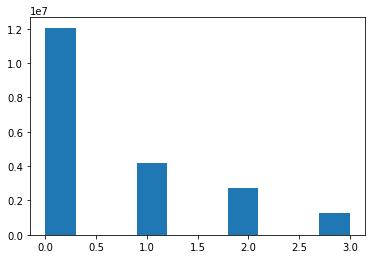

In [10]:
plt.hist(train_csv_data.meter)